<a href="https://colab.research.google.com/github/sskarthik0801/ME-597-IIOT/blob/main/HW1_Karthik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Homework 1 Guide

1. Save a copy of this ipynb file in your GoogleDrive or PC.
2. Edit the name of this code from "HW1.ipynb" to "HW1_(your name).ipynb"
3. Fill out the code cells below according to descriptions.
4. Save and upload to BrightSpace. (DO NOT clear the outputs of your code)
5. Convert the .ipynb file to PDF file and upload together


# [HW 1-1] Data Indexing
Extract sensor signal (without time column) from 0.02 seconds to 0.12 seconds by indexing the ExampleData in Github.

* Data link: 'https://github.com/purduelamm/purdue_me597_iiot/blob/main/ml_tutorial/ML1/ExampleData?raw=true'
* Index the data as DataFrame format
* Refer to ML1_Code1

In [ ]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load ExampleData from Github
path = 'https://raw.githubusercontent.com/purduelamm/purdue_me597_iiot/refs/heads/main/ml_tutorial/ML1/ExampleData' # you can define data path as a variable first

# Data indexing
ExampleData = pd.read_csv(path, sep=',',names=['time(s)', 'Acceleration(g)', 'Voltage(V)', 'Current(kA)'])
ExampleData

# Index data between 0.02 s and 0.12 s
DataIndexed = ExampleData[
    (ExampleData['time(s)'] >= 0.02) &
    (ExampleData['time(s)'] <= 0.12)
]

# Define the indexed data as 'SensorData'
SensorData = DataIndexed[['Acceleration(g)', 'Voltage(V)', 'Current(kA)']]

SensorData

,Acceleration(g),Voltage(V),Current(kA)
256,-0.40050,1.6026,3.6504
257,-0.47753,1.5377,3.5958
258,-0.58822,1.4383,3.5342
259,-0.73779,1.3535,3.4622
260,-0.85521,1.2843,3.3858
...,...,...,...
1532,-0.44388,1.7312,5.1246
1533,-0.43116,1.6670,5.0836
1534,-0.66899,1.6050,5.0335
1535,-0.57326,1.5342,4.9750


# [HW 1-2] Data Processing & Plotting
Plot the change in mean value every 0.01 seconds for each sensor signal in 'SensorData' above.
* Refer to ML1_Code3

In [ ]:
"""# Import (additional) packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Feature extraction
def rms(a):
    return np.sqrt(np.mean(a**2))
Max  = np.max(ExampleData.iloc[:,1])
Min  = np.min(ExampleData.iloc[:,1])
RMS  =    rms(ExampleData.iloc[:,1])
Var  = np.var(ExampleData.iloc[:,1])
Std  = np.std(ExampleData.iloc[:,1])
Mean = np.mean(ExampleData.iloc[:,1])

Rep_values = np.array([Max, Min, RMS, Var, Std, Mean])
Rep_values
# Create an empty array (filled with '0')
Rep_Values = np.zeros((6 , ExampleData.shape[1]-1))
Rep_Values
for i in range(ExampleData.shape[1]-1): # Loop from when i=0
                                        #        to when i='ExampleData.shape[1]-1'-1

    Rep_Values[0,i] = np.max(ExampleData.iloc[:,i+1])
    Rep_Values[1,i] = np.min(ExampleData.iloc[:,i+1])
    Rep_Values[2,i] =    rms(ExampleData.iloc[:,i+1])
    Rep_Values[3,i] = np.var(ExampleData.iloc[:,i+1])
    Rep_Values[4,i] = np.std(ExampleData.iloc[:,i+1])
    Rep_Values[5,i] = np.mean(ExampleData.iloc[:,i+1])

Rep_Values

RMS_Values = np.zeros((21 , ExampleData.shape[1]-1)) # from 0.01 to 0.21 seconds

for sensor in range(ExampleData.shape[1]-1):
    for time in range(21):

        RMS_Values[time,sensor] = rms(ExampleData.iloc[128*(time):128*(time+1),sensor+1])

RMS_Values

# Create a time column
TimeArr = np.arange(1,22)/100
print(TimeArr.shape)
TimeArr

plt.figure(figsize=(15,7))
plt.plot(TimeArr, RMS_Values[:,0], ls = '--', c = 'r', marker = 'o', ms = 5, mfc = 'r', mec = 'r')
plt.plot(TimeArr, RMS_Values[:,1], ls = '--', c = 'g', marker = 'o', ms = 5, mfc = 'g', mec = 'g')
plt.plot(TimeArr, RMS_Values[:,2], ls = '--', c = 'b', marker = 'o', ms = 5, mfc = 'b', mec = 'b')
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('RMS value')

plt.show()

# Plot graphs
plt.figure(figsize=(10,5))
plt.plot() # Acceleration
plt.plot() # Voltage
plt.plot() # Current
plt.xlabel('Time (s)') # Added placeholder label
plt.ylabel('Sensor Value') # Added placeholder label
plt.show()"""

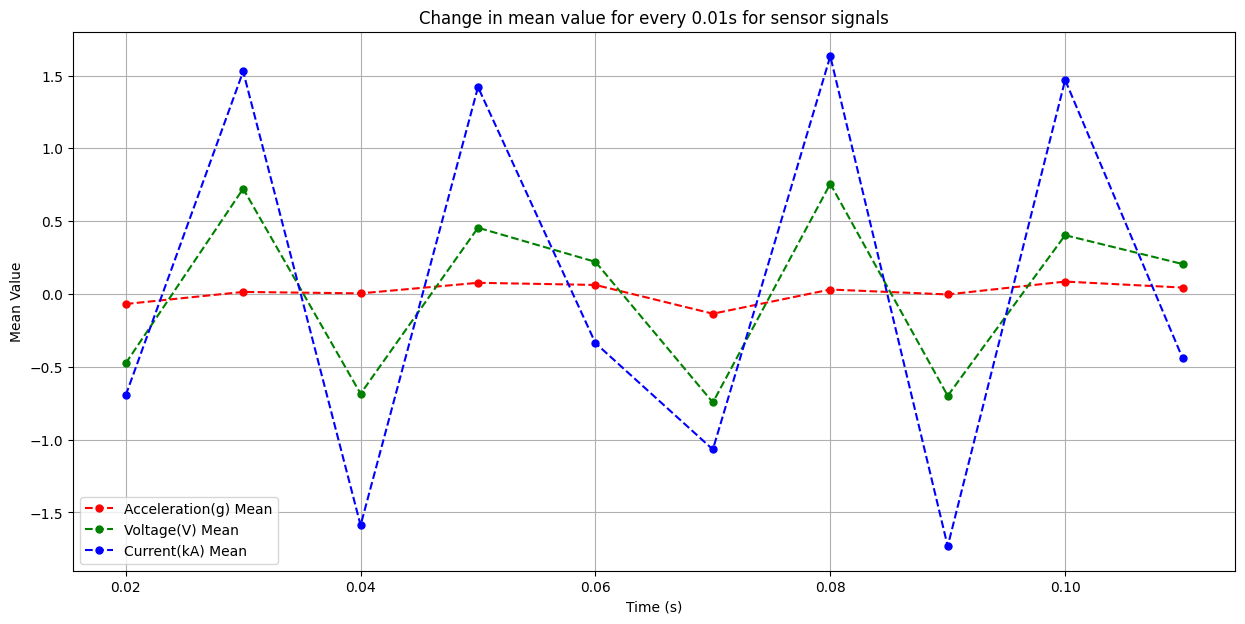

In [ ]:
# Define window size (128 samples for 0.01 seconds, based on previous code)
window_size = 128

# Calculate the number of full windows in SensorData
num_windows = len(SensorData) // window_size

# Initialize an array to store mean values
# The number of columns is the number of sensor signals (3 in SensorData)
Mean_Values = np.zeros((num_windows, SensorData.shape[1]))

# Loop through each window and calculate the mean for each sensor signal
for i in range(num_windows):
    start_index = i * window_size
    end_index = start_index + window_size
    window_data = SensorData.iloc[start_index:end_index]

    # Calculate mean for each column in the current window
    Mean_Values[i, 0] = window_data['Acceleration(g)'].mean()
    Mean_Values[i, 1] = window_data['Voltage(V)'].mean()
    Mean_Values[i, 2] = window_data['Current(kA)'].mean()

# Create a time array for plotting the mean values, SensorData starts at 0.02s, and each window is 0.01s
# So the time points for the means will be 0.02, 0.03, ..., 0.02 + (num_windows-1)*0.01
TimeArr_Mean = np.arange(0.02, 0.02 + num_windows * 0.01, 0.01)

# Plot the change in mean value over time for each sensor signal
plt.figure(figsize=(15, 7))
plt.plot(TimeArr_Mean, Mean_Values[:, 0], ls='--', c='r', marker='o', ms=5, mfc='r', mec='r', label='Acceleration(g) Mean')
plt.plot(TimeArr_Mean, Mean_Values[:, 1], ls='--', c='g', marker='o', ms=5, mfc='g', mec='g', label='Voltage(V) Mean')
plt.plot(TimeArr_Mean, Mean_Values[:, 2], ls='--', c='b', marker='o', ms=5, mfc='b', mec='b', label='Current(kA) Mean')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Mean Value')
plt.title('Change in mean value for every 0.01s for sensor signals')
plt.legend()
plt.show()


## ML1 and ML2 Summary and Deliverables

Answer the following questions for your achievements

### Q1. Please summarize ML1 and ML2.

---

We learnt to save data in csv format and extract the same csv file then index with titles and serial numbers. Then we learnt how to plot them on the graph in time domain and frequency domain.

---

### Q2. What skills did you have to develop to accomplish this project?

---

I have learnt to index the csv file and put it in a table and then plot it on graph with features using multiple python library files like numpy, pandas and matplot.

---

### Q3. What aspects of this project were the most beneficial for your learning?

---

Using the sensor data and then extracting the values to assign them and then calculate different functions was the biggest learning part.

---

### Q4. What challenges did you encounter in completing the project?

---

The plotting gets tricky in assigning on graph and finding the right loop for the function is important.

---

### Q5. How did you overcome the challenges or remedy the problems encountered?

---

Had to trial and error to find the right output and then google helped me a bit with fixing the loops.

---